In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

file_path = 'WorldHappiness.xls'
data = pd.read_excel(file_path).dropna()

- I have decided to perform a linear regression analysis to predict "Life Ladder" 

In [3]:
features = ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 
            'Positive affect', 'Negative affect']

X = data[features]
y = data['Life Ladder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

#predictions
y_pred = model.predict(X_test)
print('To estimate the accuracy of the model:')
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2:.2f}')


To estimate the accuracy of the model:
Mean Squared Error (MSE): 0.31
R-squared (R²): 0.74


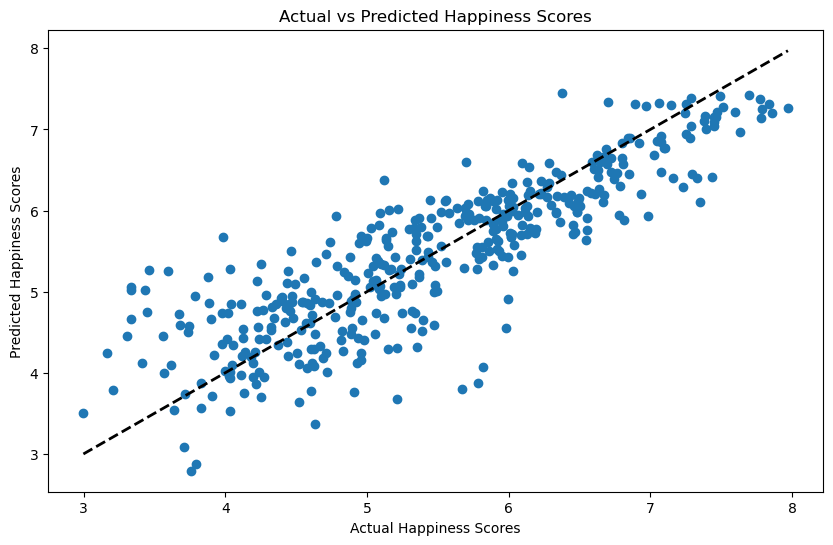

In [4]:
#plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Happiness Scores')
plt.ylabel('Predicted Happiness Scores')
plt.title('Actual vs Predicted Happiness Scores')
plt.show()

- Mean Squared Error (MSE): 0.31

    This indicates that, on average, the predicted happiness scores differ from the actual scores by 0.31 units.  The lower this number, the better our model is at making accurate predictions.

- R-squared (R²): 0.74

    This means that 74% of the variation in happiness scores can be explained by the estimated model. An R² value of 0.74 indicates a strong relationship between the independent variables and the happiness scores.

In [5]:
#coefficients of the model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nModel Coefficients:")
print(coefficients)


Model Coefficients:
                                  Coefficient
Log GDP per capita                   0.372846
Social support                       1.975737
Healthy life expectancy at birth     0.028909
Freedom to make life choices         0.492356
Generosity                           0.240198
Perceptions of corruption           -0.728851
Positive affect                      2.353834
Negative affect                      0.097173


**Interpretation of Coefficients:**

- Keeping all other variables constant, when 'Log GDP per capita' increases by 1 unit, 'Life Ladder' increases by 0.37 units.
- Keeping all other variables constant, when 'Social support' increases by 1 unit, 'Life Ladder' increases by 1.98 units.
- Keeping all other variables constant, when 'Healthy life expectancy at birth' increases by 1 unit, 'Life Ladder' increases by 0.03 units.
- Keeping all other variables constant, when 'Freedom to make life choices' increases by 1 unit, 'Life Ladder' increases by 0.49 units.
- Keeping all other variables constant, when 'Generosity' increases by 1 unit, 'Life Ladder' increases by 0.24 units.
- Keeping all other variables constant, when 'Perceptions of corruption' increases by 1 unit, 'Life Ladder' decreases by 0.73 units.
- Keeping all other variables constant, when 'Positive affect' increases by 1 unit, 'Life Ladder' increases by 2.35 units.
- Keeping all other variables constant, when 'Negative affect' increases by 1 unit, 'Life Ladder' increases by 0.10 units.



In [8]:
#residuals
residuals = y_test - y_pred
print(residuals)
print(sum.residuals)

32      0.225468
922    -0.266180
889     0.856657
474     1.018483
1526    0.334604
          ...   
82      0.243879
223     0.394558
2334    0.508152
1426    0.347419
1859   -0.136229
Name: Life Ladder, Length: 420, dtype: float64


AttributeError: 'builtin_function_or_method' object has no attribute 'residuals'

- The residuals show for how much our predictions differ from the actual values. And the graph helps us to see if there are any systematic errors or anomalies that the model did not take into account.

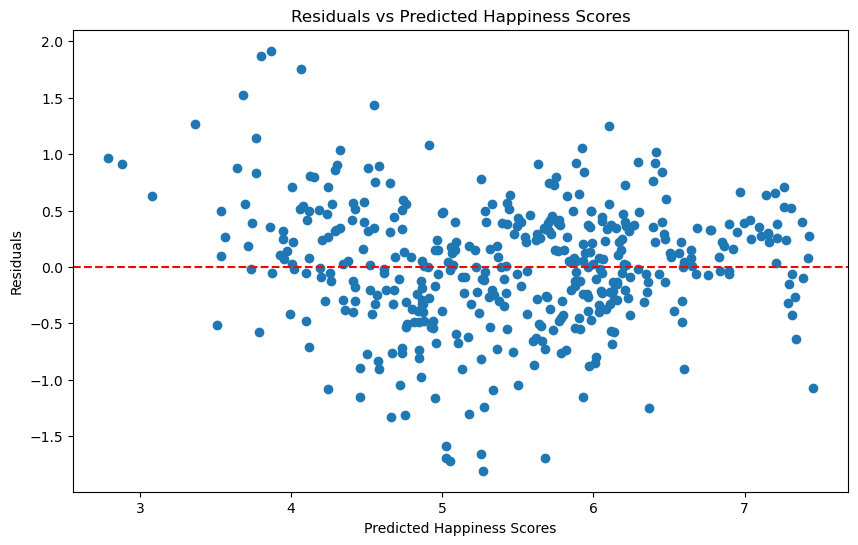

In [ ]:
#Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Happiness Scores')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Happiness Scores')
plt.show()

- The distribution of the residuals looks mostly random, which is a good sign.

- The residues have a more or less constant variance, which is also a positive sign.


- The distribution of the residuals looks mostly random, which is a good sign.

- The residues have a more or less constant variance, which is also a positive sign.


**Summary of Findings:**
- The scatter plot and residuals plot show that our model's predictions are pretty close to the actual happiness scores, and the random distribution of residuals suggests that the model fits well.

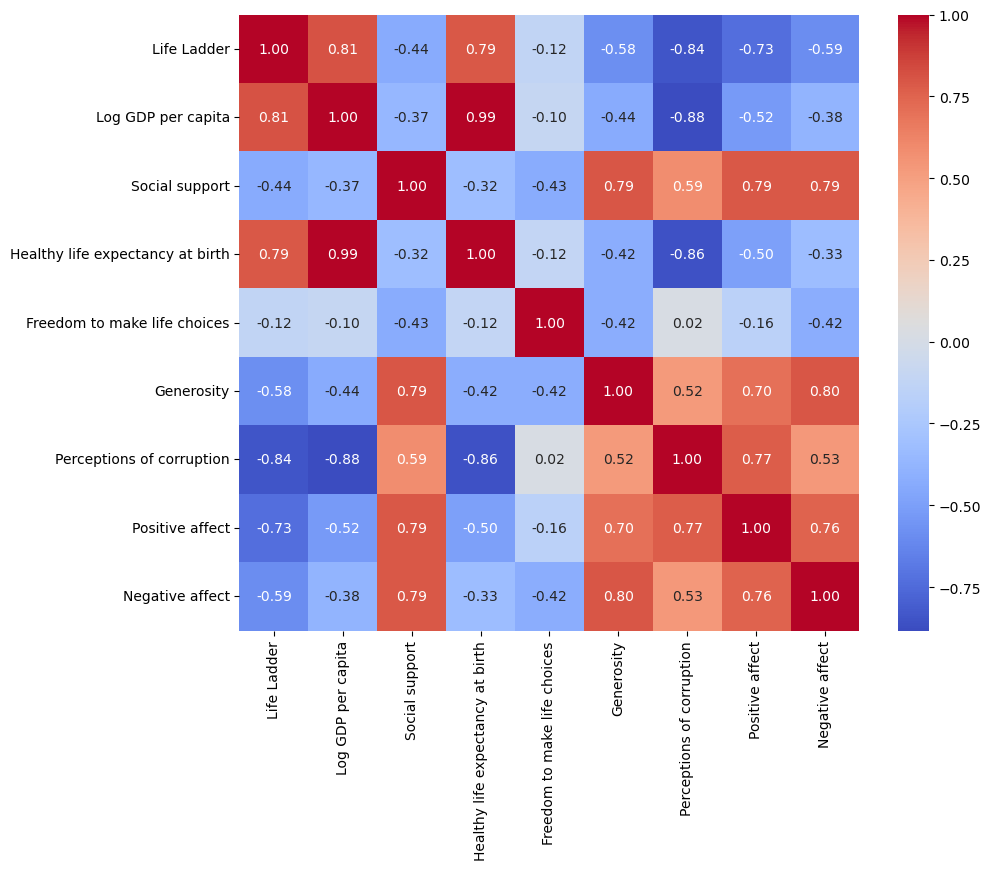

Mean Squared Error for Poland: 0.05290603710782784
R-squared for Poland: 0.6300597070876051
Prediction for Poland in 2025: 6.675844895917944


In [ ]:
poland_data = data[data['Country name'] == 'Poland']
X_poland = poland_data[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
                        'Freedom to make life choices', 'Generosity', 'Perceptions of corruption',
                        'Positive affect', 'Negative affect']]
y_poland = poland_data['Life Ladder']
plt.figure(figsize=(10, 8))
sns.heatmap(poland_data.drop(columns=['Country name', 'year']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()
X_train_poland, X_test_poland, y_train_poland, y_test_poland = train_test_split(X_poland, y_poland, test_size=0.2, random_state=42)
model_poland = LinearRegression()
model_poland.fit(X_train_poland, y_train_poland)
y_pred_poland = model_poland.predict(X_test_poland)
mse_poland = mean_squared_error(y_test_poland, y_pred_poland)
r2_poland = r2_score(y_test_poland, y_pred_poland)
print(f'Mean Squared Error for Poland: {mse_poland}')
print(f'R-squared for Poland: {r2_poland}')
poland_2025 = {
    'Log GDP per capita': 10.5269708633423,  
    'Social support': 0.89007294178009,      
    'Healthy life expectancy at birth': 69.4000015258789,  
    'Freedom to make life choices': 0.775143623352051,       
    'Generosity': -0.232159808278084,           
    'Perceptions of corruption': 0.661707103252411,  
    'Positive affect': 0.555696308612824,       
    'Negative affect': 0.15513126552105

}
poland_2025_df = pd.DataFrame([poland_2025])
poland_2025_prediction = model_poland.predict(poland_2025_df)
print(f'Prediction for Poland in 2025: {poland_2025_prediction[0]}')